---
title: Palmer Penguins Modeling Regression
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

In [70]:
import palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins

In [71]:
penguins = load_penguins()

In [72]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [73]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [74]:
penguins.dropna(inplace=True)

In [75]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

### Which variables would we need to **dummify**?

In [76]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [77]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [78]:
penguins['sex'].unique()

array(['male', 'female'], dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder = LabelEncoder()
categorical_columns = ['sex','species', 'island']
for column in categorical_columns:
    penguins[column] = penguins[column].fillna('Unknown')  
    penguins[column] = label_encoder.fit_transform(penguins[column])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2009
340,1,1,43.5,18.1,202.0,3400.0,0,2009
341,1,1,49.6,18.2,193.0,3775.0,1,2009
342,1,1,50.8,19.0,210.0,4100.0,1,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [90]:
y = penguins[['bill_depth_mm']]
X = penguins[['bill_length_mm']]

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 1.1 Linear Model

In [102]:
lr = LinearRegression()

In [93]:
lr_fit = lr.fit(X_train, y_train)

In [94]:
X_train

,bill_length_mm
242,47.5
265,51.5
286,46.6
239,51.3
196,50.5
...,...
234,47.4
185,59.6
304,46.4
145,39.0


In [95]:
y_train

,bill_depth_mm
242,15.0
265,16.3
286,17.8
239,14.2
196,15.9
...,...
234,14.6
185,17.0
304,17.8
145,18.7


In [96]:
lr_pred = lr_fit.predict(X_test)

In [98]:
mean_squared_error(y_test, lr_pred)

4.593716013790636

### 1.2 Quadratic Model

In [106]:
y = penguins[['bill_depth_mm']]
X = penguins[['bill_length_mm']]

In [107]:
X['bill_length_mm_sq'] = X['bill_length_mm'] ** 2

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_22184/2255398124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bill_length_mm_sq'] = X['bill_length_mm'] ** 2


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [109]:
X_train

,bill_length_mm,bill_length_mm_sq
54,34.5,1190.25
244,45.5,2070.25
141,40.6,1648.36
98,33.1,1095.61
153,50.0,2500.00
...,...,...
107,38.2,1459.24
324,51.5,2652.25
84,37.3,1391.29
164,45.5,2070.25


In [110]:
quad_model = lr.fit(X_train, y_train)

In [111]:
quad_pred = quad_model.predict(X_test)

In [112]:
mean_squared_error(y_test, quad_pred)

3.244447957564259

### 1.3 Cubic (degree 3 polynomial) model

In [113]:
y = penguins[['bill_depth_mm']]
X = penguins[['bill_length_mm']]

In [114]:
X['bill_length_mm_cube'] = X['bill_length_mm'] ** 3

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_22184/2779482128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bill_length_mm_cube'] = X['bill_length_mm'] ** 3


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [116]:
cube_model = lr.fit(X_train, y_train)

In [117]:
cube_pred = cube_model.predict(X_test)

In [118]:
mean_squared_error(y_test, cube_pred)

3.4215323637026054

### 1.4 Degree 10 polynomial model

In [140]:
y = penguins[['bill_depth_mm']]
X = penguins[['bill_length_mm']]

In [141]:
X['bill_length_mm_ten'] = X['bill_length_mm'] ** 10

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_22184/1831528834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bill_length_mm_ten'] = X['bill_length_mm'] ** 10


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [146]:
X_train

,bill_length_mm,bill_length_mm_ten
267,55.1,2.579384e+17
206,46.5,4.726390e+16
99,43.2,2.263797e+16
205,50.1,9.962705e+16
45,39.6,9.483133e+15
...,...,...
259,53.4,1.885439e+17
242,47.5,5.847040e+16
42,36.0,3.656158e+15
217,49.8,9.381957e+16


In [143]:
ten_model = lr.fit(X_train, y_train)

In [144]:
ten_pred = cube_model.predict(X_test)

In [145]:
mean_squared_error(y_test, ten_pred)

3.6991178152410176

In [154]:
predictions = pd.DataFrame({
    "y_test": y_test.values.ravel(), 
    "Linear": lr_pred.ravel(),  
    "Quadratic": quad_pred.ravel(),  
    "Cubic": cube_pred.ravel(),  
    "Polynomial 10": ten_pred.ravel(),  
    "bill_length_mm": X_test["bill_length_mm"].values.ravel()  
})


predictions

,y_test,Linear,Quadratic,Cubic,Polynomial 10,bill_length_mm
0,17.0,16.833901,17.671435,18.415348,17.084769,52.1
1,16.5,17.515700,18.616666,17.049213,17.196463,46.8
2,15.0,17.112382,16.583770,16.929114,17.182793,47.8
3,16.5,17.160396,16.475173,16.559917,17.248989,37.0
4,18.7,17.458083,17.060616,16.551946,17.245151,39.0
...,...,...,...,...,...,...
79,14.1,16.901121,16.512191,17.553024,17.171568,48.5
80,14.0,16.977943,16.600689,16.593017,17.227839,43.3
81,18.6,16.565022,16.999443,16.679098,17.237489,41.4
82,20.7,17.093177,17.019459,16.669425,17.243604,39.6


In [156]:
from plotnine import *

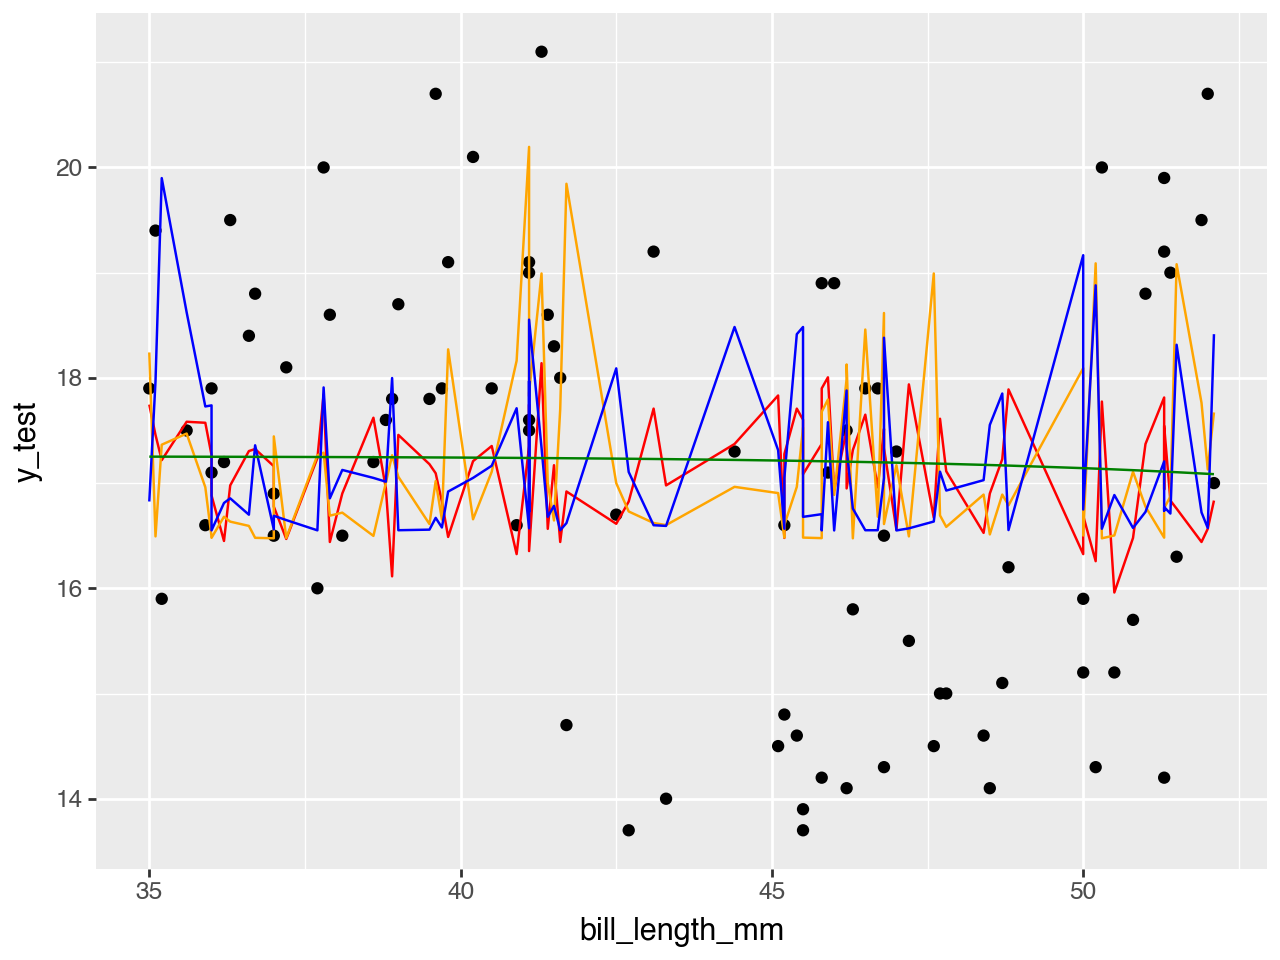

In [158]:

(ggplot(predictions, aes(x = "bill_length_mm", y = "y_test"))
 + geom_point()
 + geom_line(aes(y = "Linear"), color = "red")
 + geom_line(aes(y = "Quadratic"), color = 'orange')
 + geom_line(aes(y = "Cubic"), color = "blue")
 + geom_line(aes(y = "Polynomial 10"), color = 'green')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

> ### Underfitting: The linear model appears to be underfitting the data. It fails to capture the overall trend and variability in the data, suggesting it is too simple.

> ### Overfitting: The polynomial 10 model seems to be overfitting. It fits the training data very closely but is likely to perform poorly on new, unseen data due to its high complexity.

> ### Best Fit: The quadratic or cubic models appear to strike a balance between underfitting and overfitting. They capture the general trend in the data without being overly complex. The choice between the two might depend on further analysis and the specific goals of the model.